In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from inference import start_inference
# from v107 import extract
import os
import detectron2
import torch
import torchvision
import pandas as pd
from inference import *
import numpy as np
np.random.seed(seed=67)

In [3]:
# ! python3 inference.py paths.txt ./datasets/main/JPEGImages/00001.jpg \
# /home/kim/juche/projects/ISC21-Descriptor-Track-1st/exp/v107/train/checkpoint_0009.pth.tar \
# --config-file configs/voc/defrcn_main_1shot_seed0.yaml

In [4]:
rand_indices = list(np.random.randint(low=0, high=6777, size=1000))

In [5]:
paths = np.array([os.path.join("datasets/main/JPEGImages/", _)+"\n" \
                  for _ in os.listdir("./datasets/main/JPEGImages/") \
                  if os.path.splitext(_)[-1] in [".jpg"]])

In [6]:
with open("paths_full.txt", encoding="utf-8", mode="w") as f:
    f.writelines(list(paths))

In [7]:
ddesc = DetDescriptor("configs/voc/defrcn_main_1shot_seed0.yaml", 
              "/home/kim/juche/projects/ISC21-Descriptor-Track-1st/exp/v107/train/checkpoint_0009.pth.tar", 
              0.5, 0.7)

In [8]:
ddesc.describe_image_list("./paths_full.txt")

100%|██████████| 7228/7228 [24:20<00:00,  4.95it/s]


Saved results to: ./results/detection_20220517-0020/result.embeddings.json


'./results/detection_20220517-0020/result.embeddings.json'

In [239]:
image_fn = "old_logo_air_force_flag__75465.1471447860.380.380.jpg"

--------------------------

В compare_embeddings нужно убрать вычисление эмбеддингов для списка изображений (пока, для сервиса в стримлит). Для полного цикла сделать отдельную функцию, или в зависимости от содержимого JSON файла, подаваемого на вход compare_embeddings, запускать или не запускать индексацию списка изображений.

In [ ]:
checkpoints/voc/1/defrcn_det_r101_base2

In [240]:
sim_file = ddesc.compare_embeddings(json_path="./results/detection_20220516-1532/result.embeddings.json", image_fn=image_fn, bbox=None)

(256,)
Saved cosine similarities to ./results/detection_20220516-1532/result.embeddings.cosine.json


In [241]:
df = pd.read_json(sim_file)
df["abssim"] = df["sim"].apply(abs)
top = df.sort_values(by="abssim", ascending=False)[:10].copy(deep=True)
top

,id,im_fn,box,label,score,embedding,sim,abssim
700,245200,datasets/main/JPEGImages/02452.jpg,"[3.107270002365112, 0.0, 216.98924255371094, 2...",0,0.999311,"[0.071582719683647, -0.022659292444586, -0.046...",0.757314,0.757314
907,260100,datasets/main/JPEGImages/02601.jpg,"[1.5108788013458252, 0.0, 197.89541625976562, ...",0,0.947964,"[0.042623937129974004, -0.0011484802234910001,...",0.414422,0.414422
889,324701,datasets/main/JPEGImages/03247.jpg,"[3.331386566162109, 11.477665901184082, 148.07...",0,0.873572,"[0.018998106941580002, 0.048813369125127, -0.0...",0.393916,0.393916
487,280900,datasets/main/JPEGImages/02809.jpg,"[5.175478935241699, 15.722138404846191, 160.30...",0,0.818431,"[0.029176622629165, 0.031153144314885, -0.0403...",0.389953,0.389953
936,281700,datasets/main/JPEGImages/02817.jpg,"[3.135644912719726, 1.660465836524963, 148.929...",0,0.999472,"[0.070460587739944, 0.06500121206045101, 0.005...",0.386097,0.386097
937,281701,datasets/main/JPEGImages/02817.jpg,"[5.561604976654053, 9.502562522888184, 147.475...",0,0.716605,"[0.052475895732641005, 0.07927016913890801, 0....",0.383316,0.383316
541,329600,datasets/main/JPEGImages/03296.jpg,"[17.331525802612305, 10.562799453735352, 192.6...",0,0.799749,"[0.07844549417495701, -0.031474221497774, -0.0...",0.368680,0.368680
66,249900,datasets/main/JPEGImages/02499.jpg,"[23.42738914489746, 6.137779712677002, 149.012...",0,0.625023,"[0.042324338108301, 0.076403863728046, 0.01364...",0.367752,0.367752
757,329300,datasets/main/JPEGImages/03293.jpg,"[0.879502296447753, 0.325274109840393, 125.0, ...",0,0.998545,"[-0.013486634008586, -0.011633506976068, -0.17...",0.367590,0.367590
468,244300,datasets/main/JPEGImages/02443.jpg,"[2.073904037475586, 0.0, 150.0, 150.0]",0,0.999936,"[0.07009311020374201, -0.011921958997845001, -...",0.357233,0.357233


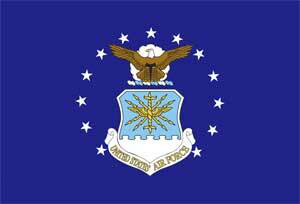

In [242]:
Image.open(image_fn).convert("RGB")

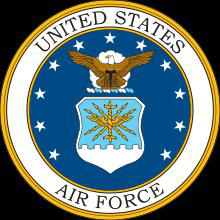

In [243]:
Image.open(top["im_fn"].iloc[0])

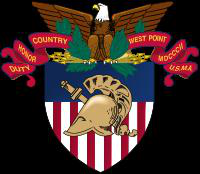

In [244]:
Image.open(top["im_fn"].iloc[1])

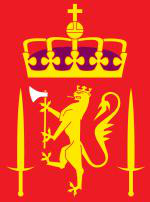

In [245]:
Image.open(top["im_fn"].iloc[2])

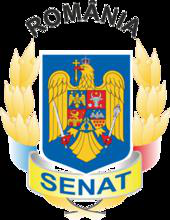

In [246]:
Image.open(top["im_fn"].iloc[3])

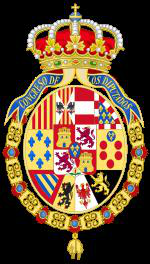

In [247]:
Image.open(top["im_fn"].iloc[4])

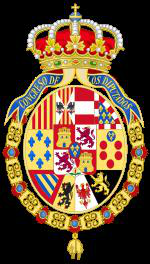

In [248]:
Image.open(top["im_fn"].iloc[5])

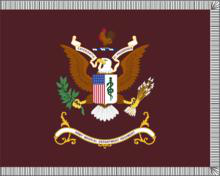

In [249]:
Image.open(top["im_fn"].iloc[6])

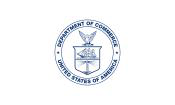

In [250]:
Image.open(top["im_fn"].iloc[7])

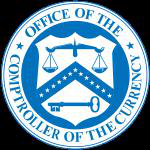

In [251]:
Image.open(top["im_fn"].iloc[9])